# Spotify Data

This is an analysis of  a dataset from Kaggle dataset, analysing songs on Spotify, including the date of released, date added to Spotify platform, band type from 2009 through 2021.

In [44]:
# start writing codes here ...

In [54]:
# Import the necessary libraries; pandas, matplotlib, and os

# analysis packages
import pandas as pd
import os

# viz packages
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadeo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
# Working directory of the dataset

working_directory = os.getcwd()
path = working_directory + '/Spotify 2010 - 2019 Top 100 Songs.xlsx'

#read csv file from directory
data = pd.read_excel(path)

# Data overview
data.head(5)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [47]:
# rename the columns

data.columns = data.columns.str.replace(' ', '_')
data.head(1)

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year,artist_type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo


In [48]:
data.size

17000

In [49]:
data.shape

(1000, 17)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top_genre      1000 non-null   object
 3   year_released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top_year       1000 non-null   int64 
 16  artist_type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


##### Add two columns to show the month and year added to Spotify platform

In [51]:
# Adding month and year coloumns

data['year_added'] = data['added'].str[:4]
data['month_added'] = data['added'].str[5:7]
data['day_added'] = data['added'].str[8:11]
data['date_added'] = data['day_added'] +'-' + data['month_added'] + '-' +data['year_added']

# convert year and month to number type
data['date_added'] = pd.to_datetime(data['date_added'])

data.drop(['added', 'day_added'], axis=1, inplace=False)

,title,artist,top_genre,year_released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year,artist_type,year_added,month_added,date_added
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,2022,02,2022-02-17
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,2022,02,2022-02-17
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,2022,02,2022-02-17
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,2022,02,2022-02-17
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,2022,02,2022-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo,2020,06,2020-06-22
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,2020,06,2020-06-22
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,2020,06,2020-06-22
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,2020,08,2020-08-20


## Artists in Spotify

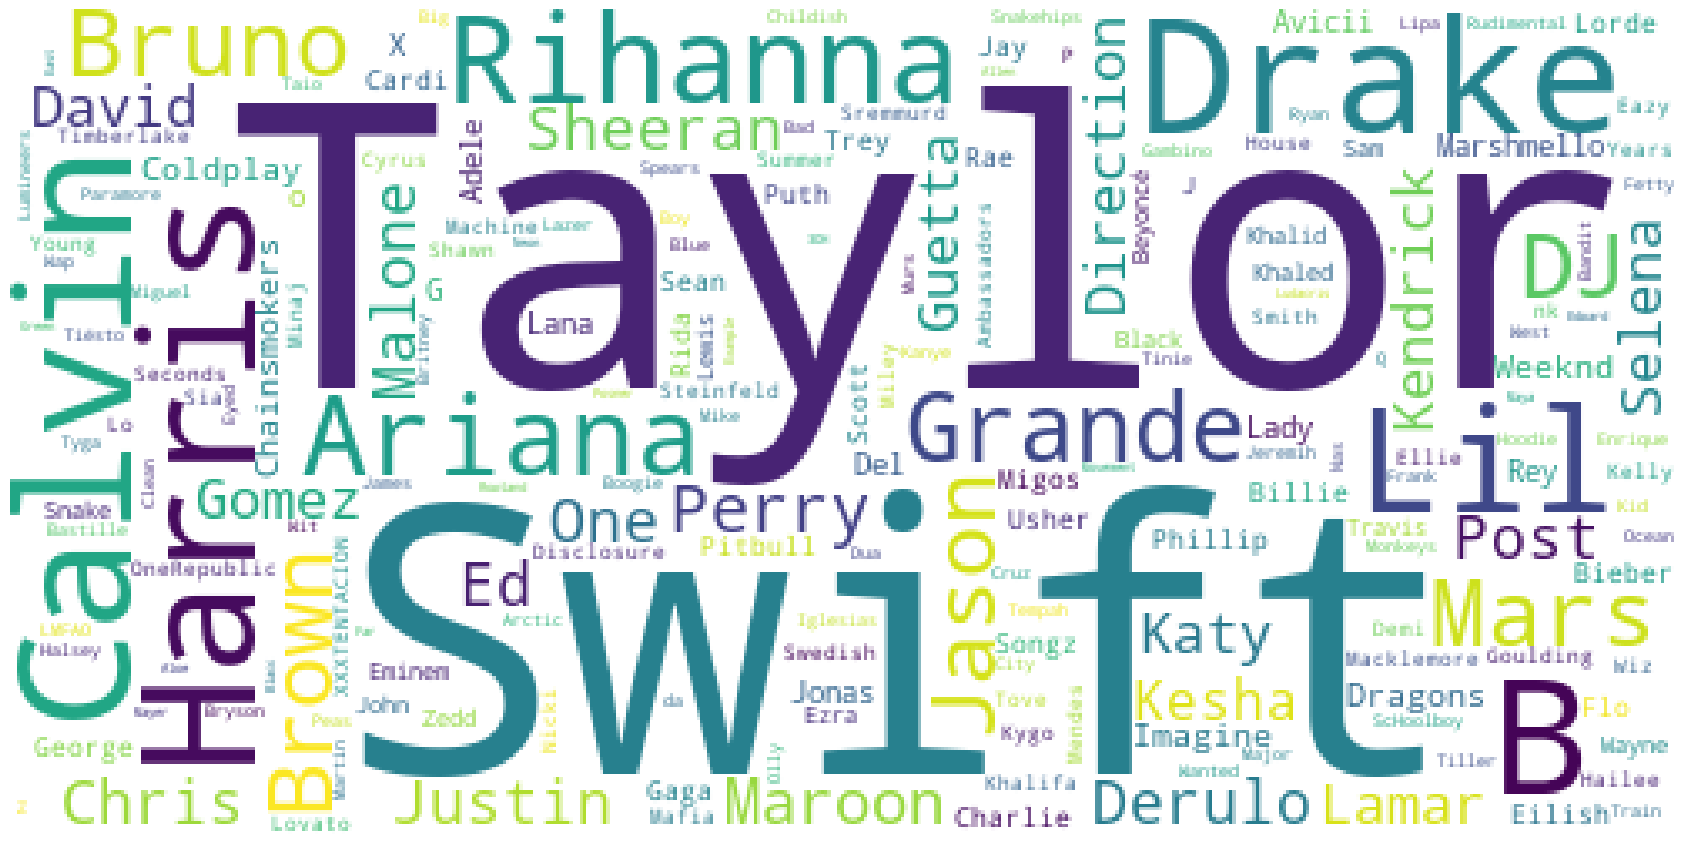

In [56]:
stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['artist'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [ ]:
artist = list(set(data.artist))

### Artist type

In [ ]:
list(set(data.artist_type))

['Duo', 'Solo', 'Trio', 'Band/Group']

In [ ]:
collab = data.groupby(['artist_type']).count()

collab.title

artist_type
Band/Group    169
Duo            70
Solo          748
Trio           13
Name: title, dtype: int64

In [ ]:
169+70+748+13

1000

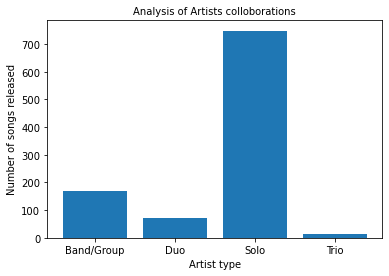

In [ ]:
x = collab.index
y = collab.title

plt.bar(x,y)
plt.title('Analysis of Artists colloborations', size = 10)
plt.xlabel('Artist type')
plt.ylabel('Number of songs released')
plt.show()

In [ ]:
### Liveliness of songs


live = data.groupby(['artist_type']).mean('live')
live.live

artist_type
Band/Group    18.579882
Duo           17.728571
Solo          17.731283
Trio          20.538462
Name: live, dtype: float64

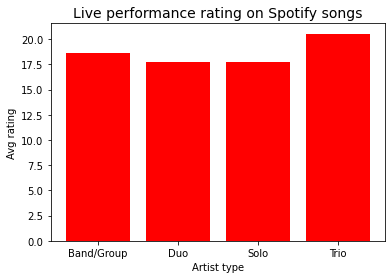

In [ ]:
x = live.index
y = live.live  

plt.bar(x,y, color='red')
plt.title('Live performance rating on Spotify songs', size = 14)
plt.xlabel('Artist type')
plt.ylabel('Avg rating')
plt.show()

##### Artist type performance ratings

In [ ]:
Duo = data[data.artist_type == 'Duo']
Band = data[data.artist_type == 'Band/Group']
Solo = data[data.artist_type == 'Solo']
Trio = data[data.artist_type == 'Trio']

In [ ]:
StatDuo = Duo.loc[:,Duo.columns!='year_released']
StatDuo = StatDuo.loc[:,StatDuo.columns!='top_year']
StatDuo.describe().astype('int32').loc['min':'max',:]

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
min,84,31,36,-9,5,10,157,0,3,39
25%,105,64,62,-6,9,36,194,1,4,66
50%,123,78,68,-5,12,55,210,4,6,74
75%,138,85,74,-4,23,78,240,11,13,78
max,200,98,90,-2,62,89,354,72,32,88


In [ ]:
StatTrio = Trio.loc[:,Trio.columns!='year_released']
StatTrio = StatTrio.loc[:,StatTrio.columns!='top_year']
StatTrio.describe().astype('int32').loc['min':'max',:]

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
min,93,52,51,-7,10,17,166,0,4,48
25%,108,64,72,-5,12,21,190,0,6,71
50%,124,69,75,-5,16,49,223,6,17,72
75%,139,81,90,-4,23,58,276,9,22,76
max,182,93,93,-3,56,75,343,31,27,79


In [ ]:
StatBand = Band.loc[:,Band.columns!='year_released']
StatBand = StatBand.loc[:,StatBand.columns!='top_year']
StatBand.describe().astype('int32').loc['min':'max',:]

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
min,76,16,19,-18,2,11,153,0,3,39
25%,100,66,53,-6,9,37,200,1,4,70
50%,120,75,64,-5,12,55,219,5,5,76
75%,132,84,70,-4,24,73,243,16,7,81
max,190,97,89,-2,70,97,354,95,46,95


In [ ]:
AvgSolo = Solo.loc[:,Solo.columns!='year_released']
AvgSolo = AvgSolo.loc[:,AvgSolo.columns!='top_year']
AvgSolo.describe().astype('int32').loc['min':'max',:]

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
min,65,6,26,-15,2,4,113,0,2,35
25%,100,58,60,-7,9,34,197,2,4,70
50%,122,70,68,-5,12,49,215,7,7,76
75%,134,81,76,-4,22,66,234,21,13,81
max,206,98,96,-1,83,97,688,98,53,94


In [ ]:
rating = data.groupby(['artist_type']).mean()
rating.astype('int32').loc[:,'bpm':'pop']

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
artist_type,,,,,,,,,,
Band/Group,120,73,61,-5,18,53,225,12,6,75
Duo,123,73,67,-5,17,54,219,10,9,72
Solo,121,68,67,-5,17,50,219,15,10,75
Trio,125,72,77,-4,20,44,233,7,14,71


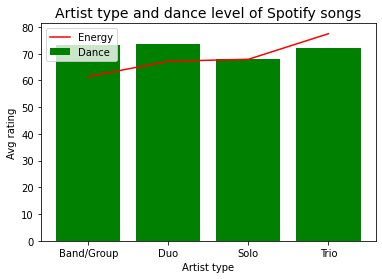

In [ ]:

plt.bar(rating.index, rating.nrgy, color='g')
plt.plot(rating.index, rating.dnce, color='red')
plt.title('Artist type and dance level of Spotify songs', size = 14)
plt.xlabel('Artist type')
plt.ylabel('Avg rating')
plt.legend(['Energy', 'Dance'])

plt.show()

### Song by year

In [ ]:
list(set(data.year_released))

[2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 1975,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [ ]:
data.head(1)

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,...,dur,acous,spch,pop,top_year,artist_type,year_added,month_added,day_added,date_added
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,...,203,0,6,70,2010,Duo,2022,02,17,2022-02-17


#### Analysis of Song Duration by year

In [ ]:
year_data = data.sort_values(
    by='year_released',
    ascending=True
)

In [ ]:
year_data.head(3)

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,...,dur,acous,spch,pop,top_year,artist_type,year_added,month_added,day_added,date_added
982,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975,2020‑06‑22,144,40,39,-10,24,...,354,29,5,77,2019,Band/Group,2020,06,22,2020-06-22
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,...,203,0,6,70,2010,Duo,2022,02,17,2022-02-17
34,Do You Remember,Jay Sean,dance pop,2009,2022‑02‑17,126,67,85,-5,10,...,211,2,7,74,2010,Solo,2022,02,17,2022-02-17


In [ ]:
year_data = year_data.groupby(['year_released']).mean()

year_data = round(year_data,0)

year_data = year_data[1:]


In [ ]:
year_data.index   

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020, 2021],
           dtype='int64', name='year_released')

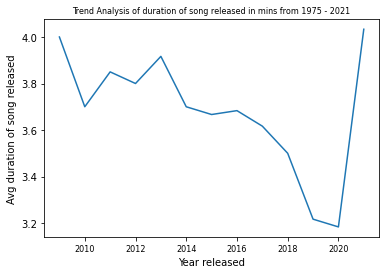

In [ ]:
x = year_data.index
y = year_data.dur/60

plt.plot(x,y)

plt.xlabel('Year released')
plt.ylabel('Avg duration of song released')
plt.title('Trend Analysis of duration of song released in mins from 1975 - 2021', size=8)
plt.xticks(rotation='horizontal', size=8)
plt.show()

### Analyis of songs released by Artist

In [ ]:
group_artist = data.groupby(['artist']).count()
group_artist = group_artist.rename(columns={'top_genre':'no_songs'})
group_artist.no_songs.head(10)

artist
2 Chainz                  2
21 Savage                 2
3OH!3                     2
5 Seconds of Summer       4
6ix9ine                   2
A Boogie Wit da Hoodie    3
A$AP Ferg                 1
A$AP Rocky                1
AJ Tracey                 1
AJR                       1
Name: no_songs, dtype: int64

In [ ]:
### Artists with highest number of songs released

Top = group_artist.nlargest(10, 'title')


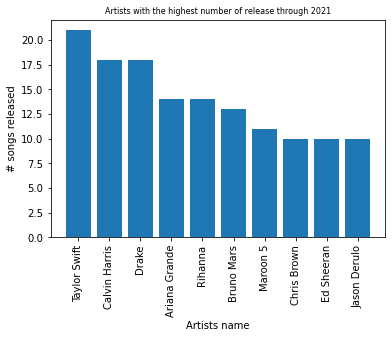

In [ ]:
x = Top.index
y = Top.title

plt.bar(x,y)

plt.xlabel('Artists name')
plt.ylabel('# songs released')
plt.title('Artists with the highest number of release through 2021', size=8)
plt.xticks(rotation='vertical', size=10)
plt.show()

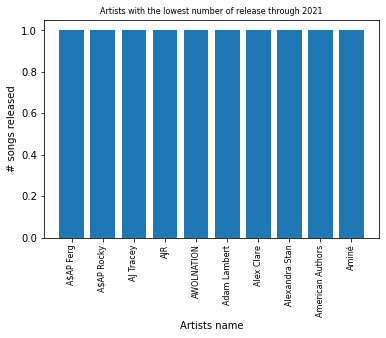

In [ ]:
### Artists with lowest number of songs released

group_artist = data.groupby(['artist']).count()

Bottom30 = group_artist.nsmallest(10, 'title')

x = Bottom30.index
y = Bottom30.title

plt.bar(x,y)

plt.xlabel('Artists name')
plt.ylabel('# songs released')
plt.title('Artists with the lowest number of release through 2021', size=8)
plt.xticks(rotation='vertical', size=8)
plt.show()

In [ ]:
## Artist with the highest song

Artist1 = group_artist.nlargest(1, 'title')

Artist1.title


artist
Taylor Swift    21
Name: title, dtype: int64

#### Artist popularity rating

In [ ]:
### Group artist by popularity rating

artist_rating = data.groupby(['artist']).mean().loc[:,'bpm':'pop']
artist_rating = artist_rating.rename(columns={'pop':'popularity'})
artist_rating.sort_values('popularity').head(5)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
artist,,,,,,,,,,
Professor Green,101.0,75.0,66.0,-6.0,22.0,45.0,236.0,34.0,4.0,35.0
Plan B,147.0,54.0,72.0,-6.0,16.0,83.0,211.0,30.0,14.0,39.0
DJ Fresh,157.5,94.5,45.0,-1.5,23.5,43.5,193.0,1.5,4.5,40.5
Sidney Samson,126.0,98.0,80.0,-2.0,13.0,29.0,321.0,0.0,5.0,42.0
INNA,128.0,71.0,81.0,-8.0,26.0,51.0,224.0,6.0,14.0,43.0


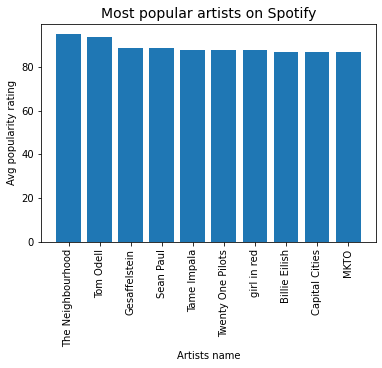

In [ ]:
### Artists with highest popularity rating

Top_rating = artist_rating.nlargest(10, 'popularity')

var1 = Top_rating.index
var2 = Top_rating.popularity

plt.bar(var1,var2)

plt.xlabel('Artists name')
plt.ylabel('Avg popularity rating')
plt.title('Most popular artists on Spotify', size=14)
plt.xticks(rotation='vertical', size=10)
plt.show()

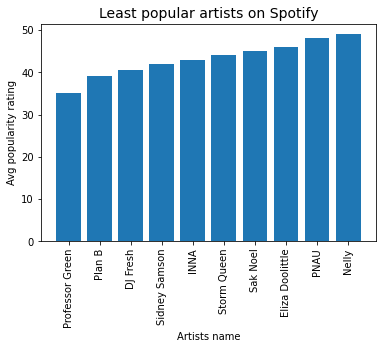

In [ ]:
### Artists with lowest popularity rating

Bottom_rating = artist_rating.nsmallest(10, 'popularity')

varx = Bottom_rating.index
vary = Bottom_rating.popularity

plt.bar(varx,vary)

plt.xlabel('Artists name')
plt.ylabel('Avg popularity rating')
plt.title('Least popular artists on Spotify', size=14)
plt.xticks(rotation='vertical', size=10)
plt.show()

### Analysis of songs by year released

In [ ]:
data.head(1)

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,...,dur,acous,spch,pop,top_year,artist_type,year_added,month_added,day_added,date_added
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,...,203,0,6,70,2010,Duo,2022,02,17,2022-02-17


In [ ]:
released = data.groupby(['year_released']).count()
released = released.iloc[1:]
released

,title,artist,top_genre,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year,artist_type,year_added,month_added,day_added,date_added
year_released,,,,,,,,,,,,,,,,,,,,
2009,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2010,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
2011,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
2012,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
2013,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
2014,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
2015,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
2016,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
2017,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99


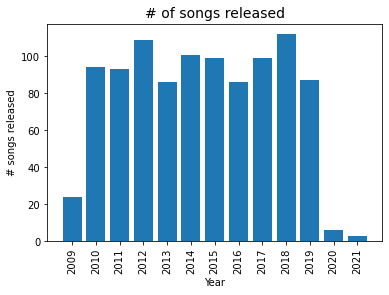

In [ ]:
# plot the charts
x = released.index
y = released.title
keys = range(2009,2022)

plt.bar(x,y)

plt.xlabel('Year')
plt.ylabel('# songs released')
plt.title('# of songs released', size=14)
plt.xticks(keys, rotation='vertical', size=10)
plt.yticks(rotation='horizontal', size=10)
plt.grid(0)

plt.show()

In [ ]:
pop_stat = data.groupby(['year_released']).mean(['popularity'])
pop_stat.astype('int32').loc[:,'pop']

year_released
1975    77
2009    70
2010    71
2011    72
2012    73
2013    72
2014    74
2015    75
2016    75
2017    77
2018    78
2019    77
2020    69
2021    59
Name: pop, dtype: int32

In [ ]:
### define the variables

x = pop_stat.index
x = x.drop(1975)

In [ ]:
y = pop_stat.popularity
y = y.iloc[1:]

AttributeError: 'DataFrame' object has no attribute 'popularity'

In [ ]:
# plot the charts

keys = range(2009,2022)

plt.bar(x,y)

plt.xlabel('Year')
plt.ylabel('Avg popularity rating')
plt.title('Popularity rating of songs on Spotify', size=12)
plt.xticks(keys, rotation='vertical', size=10)
plt.yticks(rotation='horizontal', size=10)
plt.grid(0)
plt.show()

In [ ]:
### Dancebility and energy of songs overtime

z = pop_stat.dnce
z = z.iloc[1:]

z1 = pop_stat.nrgy
z1 = z1.iloc[1:]

In [ ]:
# plot the charts

keys = range(2009,2022)

plt.bar(x,z)

plt.ylabel('Avg rating')
plt.title('Dancebility of songs on Spotify', size=12)
plt.xticks(keys, rotation='vertical', size=10)
plt.yticks(rotation='horizontal', size=10)
plt.grid(0)
plt.show()

In [ ]:
# plot the charts

keys = range(2009,2022)

plt.bar(x,z1)

plt.ylabel('Avg rating')
plt.title('Energy level of songs on Spotify', size=12)
plt.xticks(keys, rotation='vertical', size=10)
plt.yticks(rotation='horizontal', size=10)
plt.grid(0)
plt.show()

In [ ]:
beat = pop_stat.bpm
beat = beat.iloc[1:]
beat

# plot the charts

keys = range(2009,2022)

plt.bar(x,beat)

plt.ylabel('Avg rating')
plt.title('Beat level of songs on Spotify', size=14)
plt.xticks(keys, rotation='vertical', size=10)
plt.yticks(rotation='horizontal', size=10)
plt.grid(0)
plt.show()

In [ ]:
beat_gth = ((pop_stat.bpm/pop_stat.bpm.iloc[1])-1)*100
beat_gth = beat_gth.iloc[1:]
beat_gth

# plot the charts

keys = range(2009,2022)

plt.bar(x,beat_gth, color='g')

plt.ylabel('Avg rating')
plt.title('Growth % in beat level of songs on Spotify', size=12)
plt.xticks(keys, rotation='vertical', size=10)
plt.yticks(rotation='horizontal', size=10)
plt.grid(0)
plt.show()

### Analysis of Song by Genre

In [57]:
data.head(2)

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,...,acous,spch,pop,top_year,artist_type,year_added,month_added,day_added,date_added,title_no_stopwords
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,...,0,6,70,2010,Duo,2022,02,17,2022-02-17,[3OH!3]
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,...,1,8,68,2010,Duo,2022,02,17,2022-02-17,[3OH!3]


In [ ]:
genre = data.groupby(['top_genre']).count()
genre.head()

In [ ]:
a = data['top_genre'].unique()
a

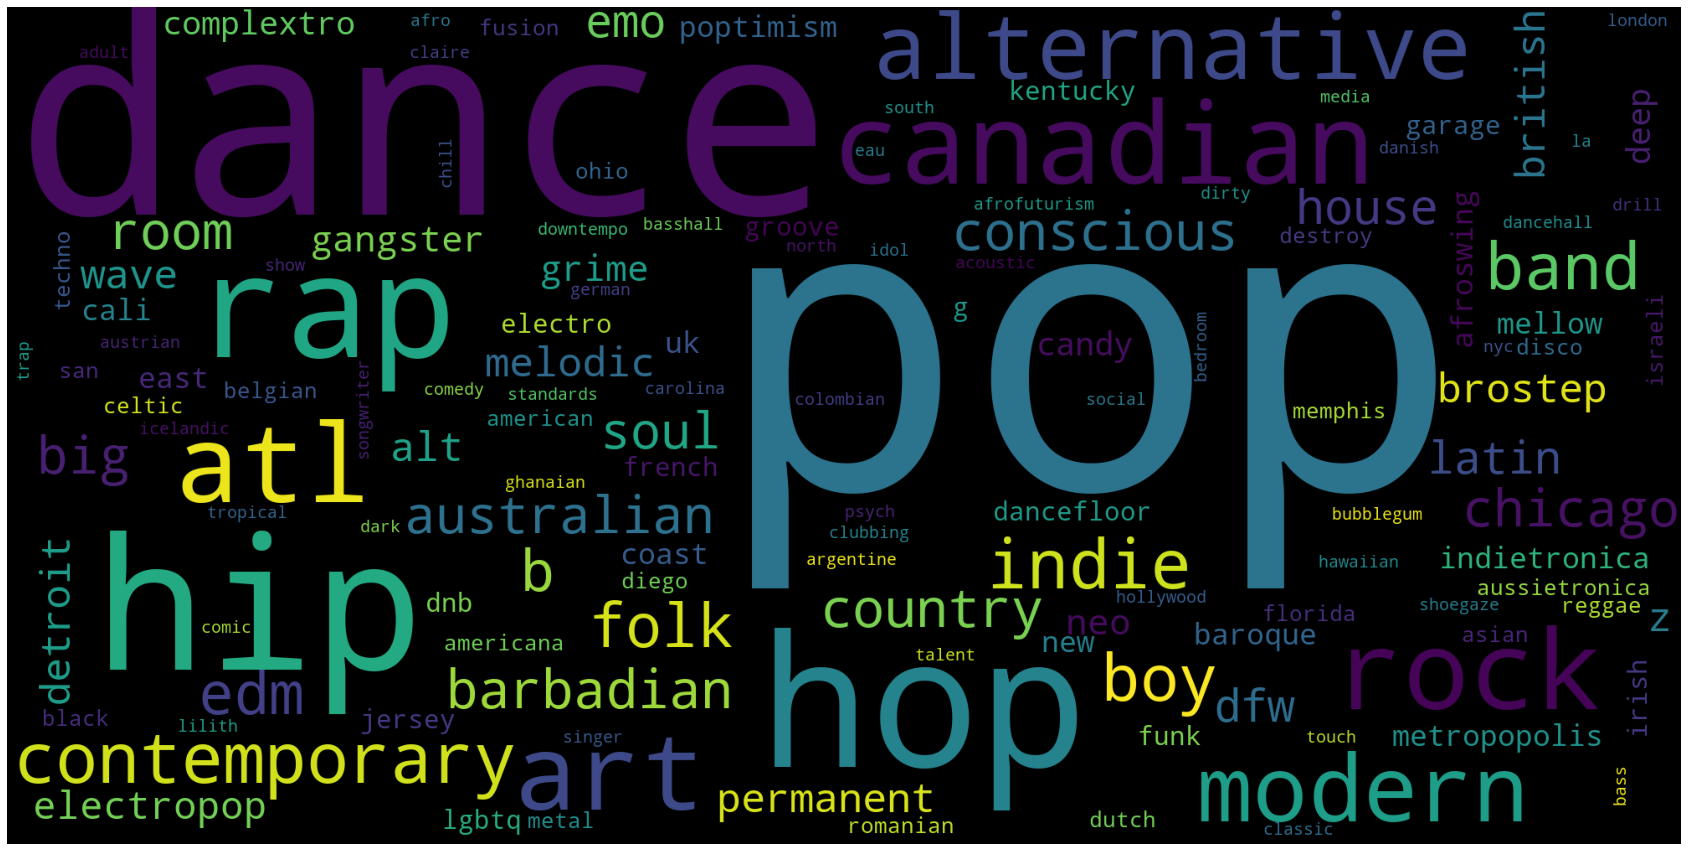

In [58]:
stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['top_genre'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

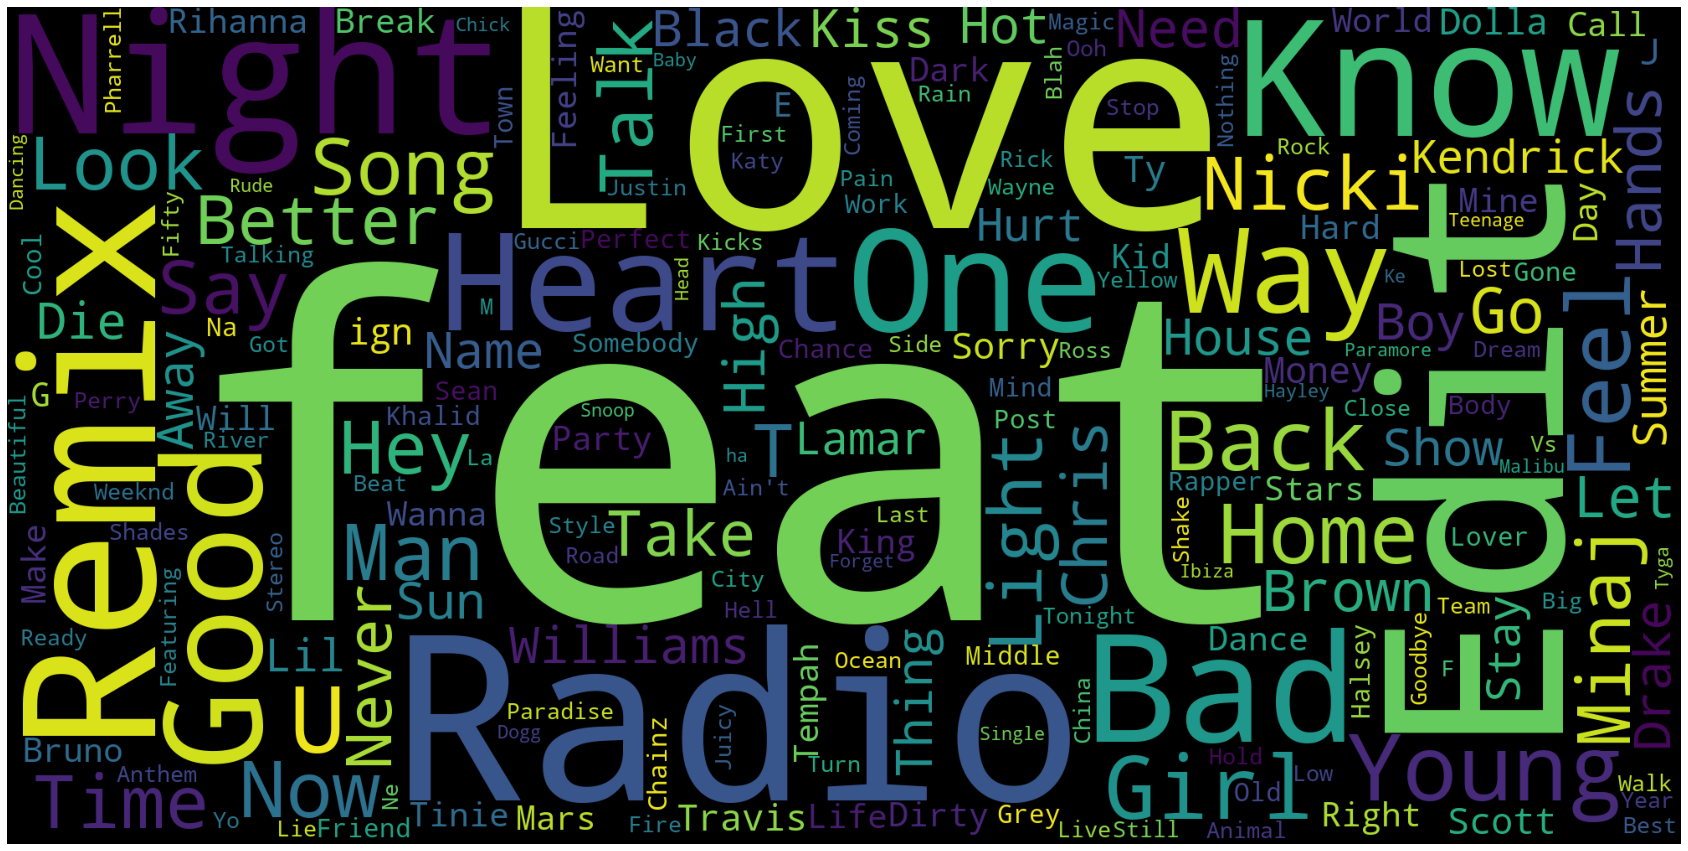

In [59]:
stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [ ]:
# plot the charts

df = genre.nlargest(10, 'title')
x = df.index
y= df.title

plt.bar(x,y)

plt.xlabel('Genre Type')
plt.ylabel('# songs released')
plt.title('# of songs released by genre from 1975 - 2021', size=12)
plt.xticks(rotation='vertical', size=8)
plt.yticks(rotation='horizontal', size=10)
plt.grid(0)
plt.show()

### Analysis of Song by year added to Spotify platform

In [ ]:
list(set(data.year_added))

In [ ]:
added = data.groupby(['year_added']).count()
added.title

In [ ]:
762+134+104

In [ ]:
### plot the charts

a = added.index
b = added.title
keys = added.index

plt.bar(a,b)

plt.xlabel('year in which the song was added')
plt.ylabel('# songs added')
plt.title('# of songs added on Spotify platform between 2020-2022', size=8)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()


In [ ]:
type = data.groupby(['artist_type']).mean()
type.bpm

In [ ]:
### plot the charts


keys = type.index

plt.bar(type.index, type.dnce)
plt.ylabel('Avg dancability rating')
plt.title('Song category that is danceable')

plt.show()


In [ ]:
### plot the charts


keys = type.index

plt.bar(type.index, type.acous)
plt.ylabel('Avg dancability rating')
plt.title('Song category that is danceable')

plt.show()

In [ ]:
### plot the charts


keys = type.index

plt.bar(type.index, type.popularity)

plt.title('Song collaboration and popularity rating', size=12)
plt.ylabel('Avg popularity rating')
plt.xlabel('Collaboration type')

plt.show()